In [2]:
import re
import os
import time
import requests
import pickle
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')

In [289]:
def print_or_none(item):
    if pd.isnull(item): 
        return np.nan
    else:
        return item.group(1)
def song_info(url):
    response = requests.get(url)
    response.encoding = "utf_8"
    page = response.text
    soup = BeautifulSoup(page, "html.parser")
    image_url=soup.find_all('meta')[27]['content']
    
    test=soup.find_all('script')[-1].text
    
    r1=re.search('\"artist\"\:\"(.+)","album_title',test) 
    r1=print_or_none(r1)
    
    r2=re.search('\"title\"\:\"(.+)\"\,\"uri',test)
    r2=print_or_none(r2)
    
    r3=re.search('playback_count\"\:(\d+)\,\"',test)
    r3=float(print_or_none(r3))

    r15=re.findall('"likes_count\"\:(\d+)\,\"',test)[1]
    r15=float(r15)
    
    r4=re.search('reposts_count\"\:(\d+)\,\"',test)
    r4=float(print_or_none(r4))

    r5=re.search('\"comment_count\"\:(\d+)\,\"',test)
    r5=float(print_or_none(r5))
    
    r6=re.search('\"genre\"\:\"([A-Za-z0-9 ]+)',test)
    r6=print_or_none(r6)
    
    r7=re.search('followers_count\"\:(\d+)\,\"',test)
    r7=float(print_or_none(r7))

    r8=re.search('playlist_count\"\:(\d+)\,\"',test)
    r8=float(print_or_none(r8))

    r9=re.search('track_count\"\:(\d+)\,\"',test)
    r9=float(print_or_none(r9))

    r10=re.search('\"display_date\"\:\"([A-Za-z0-9:-]*)',test)
    r10=print_or_none(r10)

    r11=re.search('\"created_at\"\:\"([A-Za-z0-9:-]*)',test)
    r11=print_or_none(r11)
    
    r12=re.search('\"duration\"\:(\d+)\,\"',test)
    r12=float(print_or_none(r12))
    
    r13=re.search('\"full_duration\"\:(\d+)\,\"',test)
    r13=float(print_or_none(r13))

    r14=re.search('\"country_name\"\:\"([A-Za-z0-9 ]*)',test)
    r14=print_or_none(r14)
    
    return (r1,r2,r3,r15,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,image_url)
def spl(x):
    try: return x.split('T')[0]
    except: return np.nan
def get_track_or_album_url(url):
    response = requests.get(url)
    response.encoding = "utf_8"
    page = response.text
    soup = BeautifulSoup(page, "html.parser")

    album_li=[]
    pubdate_li=[]
    
    for s in soup.find_all('h2',{'itemprop':"name"}):
        album_li.append(s.find('a')['href'])

    for t in soup.find_all('time'):
        pubdate_li.append(t.text.split('T')[0])
    
    return list(zip(album_li,pubdate_li))

### 1.  get all the list of genres of Top 50 charts  using Selenium

In [ ]:
chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [ ]:
matrix_url = "https://soundcloud.com/charts"
driver = webdriver.Chrome(chromedriver)
driver.get(matrix_url)
driver.find_element_by_xpath('//*[@id="content"]/div/div/div[1]/div[2]/div/div[2]/div[4]/button').click()
xpath='//*[@id="dropdown-button-72"]/div/div/div/div[1]/div/section[2]/ul/li[{}]/a'

In [ ]:
genre_list=[]
for i in range(1,31):
    result=driver.find_element_by_xpath(xpath.format(str(i))).get_attribute('href')
    genre_list.append(result)                                    

pickle the genre_list

In [ ]:
with open('genre_list.p','wb') as picklefile:
    pickle.dump(list(dic_all.keys()),picklefile)

### 2. extract all the urls of the top 50 songs of each genre

In [ ]:
matrix_url = "https://soundcloud.com/charts"
driver = webdriver.Chrome(chromedriver)
driver.get(matrix_url)

In [ ]:
def get_song_url(genre_url):
    driver.get(genre_url)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    xpath2='//*[@id="content"]/div/div/div[1]/div[2]/div/div[4]/ul/li[{}]/div/div[3]/div[2]/a'
    chart_list=[]
    for i in range(1,51):
        result=driver.find_element_by_xpath(xpath2.format(str(i))).get_attribute('href')
        chart_list.append(result) 
    
    return chart_list 

In [ ]:
dic_all=dict()
for g in genre_list:
    dic_all.update({g:get_song_url(g)})

pickle the songs'url

In [ ]:
with open('dic_all.p','wb') as picklefile:
    pickle.dump(dic_all,picklefile)

In [ ]:
with open("dic_all.p", 'rb') as picklefile: 
    dic_all = pickle.load(picklefile)

let's see how many songs I get => 30 genres * 50 songs = 1500

In [ ]:
all_song=[]
for i in dic_all.values():
    all_song.extend(i)
len(all_song)

create the function called "print_or_not" to return np.nan if there is no value instead of error

create the function named "song_info" to scrap all the values of the features I want to extract

In [4]:
def print_or_none(item):
    if pd.isnull(item): 
        return np.nan
    else:
        return item.group(1)

def song_info(url):
    response = requests.get(url)
    response.encoding = "utf_8"
    page = response.text
    soup = BeautifulSoup(page, "html.parser")
    image_url=soup.find_all('meta')[27]['content']
    
    test=soup.find_all('script')[-1].text
    
    r1=re.search('\"artist\"\:\"(.+)","album_title',test) 
    r1=print_or_none(r1)
    
    r2=re.search('\"title\"\:\"(.+)\"\,\"uri',test)
    r2=print_or_none(r2)
    
    r3=re.search('playback_count\"\:(\d+)\,\"',test)
    r3=print_or_none(r3)

    r15=re.findall('"likes_count\"\:(\d+)\,\"',test)[1]
    
    r4=re.search('reposts_count\"\:(\d+)\,\"',test)
    r4=print_or_none(r4)

    r5=re.search('\"comment_count\"\:(\d+)\,\"',test)
    r5=print_or_none(r5)
    
    r6=re.search('\"genre\"\:\"([A-Za-z0-9 ]+)',test)
    r6=print_or_none(r6)
    
    r7=re.search('followers_count\"\:(\d+)\,\"',test)
    r7=print_or_none(r7)

    r8=re.search('playlist_count\"\:(\d+)\,\"',test)
    r8=print_or_none(r8)

    r9=re.search('track_count\"\:(\d+)\,\"',test)
    r9=print_or_none(r9)

    r10=re.search('\"display_date\"\:\"([A-Za-z0-9:-]*)',test)
    r10=print_or_none(r10)

    r11=re.search('\"created_at\"\:\"([A-Za-z0-9:-]*)',test)
    r11=print_or_none(r11)
    
    r12=re.search('\"duration\"\:(\d+)\,\"',test)
    r12=print_or_none(r12)
    
    r13=re.search('\"full_duration\"\:(\d+)\,\"',test)
    r13=print_or_none(r13)

    r14=re.search('\"country_name\"\:\"([A-Za-z0-9 ]*)',test)
    r14=print_or_none(r14)
    
    return (r1,r2,r3,r15,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,image_url)
  

In [5]:
with open('all_song.p','rb') as picklefile:
    all_song=pickle.load(picklefile)

### 3. Let's get all the data using BeautifulSoup :-)  

In [9]:
output_li=[]
for i in range(100):
    try: 
        output = song_info(all_song[i])
        output_li.append(output)
    except:
        output_li.append([np.nan]*15)
        print('error occured.. index' + str(i))

In [10]:
for i in range(100,1500):
    try: 
        output = song_info(all_song[i])
        output_li.append(output)
    except:
        output_li.append([np.nan]*15)
        print('error occured.. index' + str(i))

error occured.. index1465


In [ ]:
with open('output_li.p','wb') as picklefile:
    pickle.dump(output_li,picklefile)

In [15]:
col=['artist', 'title', 'playback_count', 'likes_count', 'reposts_count',
    'comment_count', 'genre', 'followers_count', 'playlist_count', 
 'track_count', 'display_date','created_at','duration','full_duration','country_name','image_url']

df_top=pd.DataFrame(output_li,columns=col)
df_top['original_url']=all_song

In [21]:
with open('df_top.p','wb') as picklefile:
    pickle.dump(df_top,picklefile)

# -----------------------------------------------------

In [ ]:
df_top['display_date2']=df_top['display_date'].apply(lambda x: x.split('T')[0])

df_top['display_date2']=pd.to_datetime(df_top['display_date2'])

In [ ]:
import datetime
df_top.datetime.today()-df_top['display_date2'][0]

In [ ]:
with open('df_top.p','wb') as picklefile:
    pickle.dump(df_top,picklefile)

pickle the songs'url

In [84]:
all_song=[]
for i in dic_all.values():
    all_song.extend(i)
all_url_albums=['https://soundcloud.com/' + song.split('/')[3]+'/albums' for song in all_song]
all_url_tracks=['https://soundcloud.com/' + song.split('/')[3]+'/tracks' for song in all_song]

In [88]:
with open('all_song.p','wb') as picklefile:
    pickle.dump(all_song,picklefile)
with open('all_url_tracks.p','wb') as picklefile:
    pickle.dump(all_url_tracks,picklefile)

In [4]:
with open("dic_all.p", 'rb') as picklefile: 
    dic_all = pickle.load(picklefile)

In [ ]:
artist_album_info=[]
for i in range(len(all_url)):
    if i%50==0: print('processing... '+str(i))
    try:
        artist_album_info.append(get_track_or_album_url(all_url_albums[i]))
    except:
        artist_album_info.append([np.nan])
        print('error '+str(i))

In [ ]:
artist_track_info=[]
for i in range(len(all_url_tracks)):
    if i%50==0: print('processing... '+str(i))
    try:
        artist_track_info.append(get_track_or_album_url(all_url_tracks[i]))
    except:
        artist_track_info.append([np.nan])
        print('error '+str(i))

In [198]:
url_album_zip=list(zip(all_song,artist_album_info))

In [102]:
dict_track=dict()
for i in range(1500):
    temp_list=[]
    for j in artist_track_info[i]:
        url='https://soundcloud.com'+j[0]
        try: 
            output=song_info(url)
            temp_list.append(output)
        except: print('error: ',i,j)
    if len(temp_list)>0:        
        dict_track.update({all_song[i]:temp_list})

In [121]:
list_track=[]
for key in dict_track.keys():
    for val in dict_track[key]:
        list_track.append((key,val))

list_track_2=[]
for i,j in list_track:
    l1=[i]
    l2=list(j)
    list_track_2.append((l1+l2))
    
df_track=pd.DataFrame(list_track_2)


In [145]:
with open("df_top.p", 'rb') as picklefile: 
    df_top = pickle.load(picklefile)

In [165]:
df_top['display_date2']=np.nan
df_top['display_date2']=df_top['display_date'].apply(spl)
df_top['display_date2']=pd.to_datetime(df_top['display_date2'])

col=['original_url','artist', 'title', 'playback_count', 'likes_count', 'reposts_count',
    'comment_count', 'genre', 'followers_count', 'playlist_count', 'track_count', 'display_date','created_at','duration','full_duration','country_name','image_url']
df_track.columns=col

In [178]:
df_join=df_track.merge(df_top[['original_url','display_date2']],how='outer',on='original_url')
df_join['display_date']=df_join['display_date'].apply(spl)
df_join['display_date']=pd.to_datetime(df_join['display_date'])
df_join.head(3)

,original_url,artist,title,playback_count,likes_count,reposts_count,comment_count,genre,followers_count,playlist_count,track_count,display_date,created_at,duration,full_duration,country_name,image_url,display_date2
0,https://soundcloud.com/lil_peep/lil-peep-ft-xx...,Lil Peep,Broken Smile (My All),5230034,102375,3572,2019,Alternative Rock,1207667,4,73,2018-11-09T05:00:27Z,2013-12-15T23:51:31Z,280607,280607,United States,https://i1.sndcdn.com/artworks-000432992052-3e...,2018-09-19
1,https://soundcloud.com/lil_peep/lil-peep-ft-xx...,Lil Peep,Sex With My Ex,5216583,94913,3086,1335,Alternative Rock,1207667,4,73,2018-11-09T05:00:23Z,2013-12-15T23:51:31Z,213727,213727,United States,https://i1.sndcdn.com/artworks-000432991731-vz...,2018-09-19
2,https://soundcloud.com/lil_peep/lil-peep-ft-xx...,Lil Peep,Leanin',3368663,58666,1910,647,Alternative Rock,1207667,4,73,2018-11-09T05:00:20Z,2013-12-15T23:51:31Z,206569,206569,United States,https://i1.sndcdn.com/artworks-000432991488-en...,2018-09-19


In [ ]:
col2=['playback_count', 'likes_count', 'reposts_count',
    'comment_count', 'followers_count', 'playlist_count', 'track_count', 'duration','full_duration']

for c in col2:
    df_join[c] = df_join[c].apply(lambda x: float(x))


In [186]:
df_join2= df_join[df_join.display_date<df_join.display_date2]

In [290]:
with open('df_join2.p','wb') as picklefile:
    pickle.dump(df_join2,picklefile)

In [395]:
df_join_track =  df_join2.groupby(['original_url'],as_index=False).mean()

## merge tables 

In [400]:
df_join_track
with open('df_join_track.p','wb') as picklefile:
    pickle.dump(df_join_track,picklefile)

In [397]:
ddd_track=df_join2.groupby(['original_url'],as_index=False).count()
ddd_track.head(5)

,original_url,artist,title,playback_count,likes_count,reposts_count,comment_count,genre,followers_count,playlist_count,track_count,display_date,created_at,duration,full_duration,country_name,image_url,display_date2
0,https://soundcloud.com/0600-records/diana-ross...,0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
1,https://soundcloud.com/147calboy/calboy-envy-m...,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2,https://soundcloud.com/1788-l/rl-grime-era-1-7...,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
3,https://soundcloud.com/7777886633777/cherry,0,4,4,4,4,4,0,4,4,4,4,4,4,4,4,4,4
4,https://soundcloud.com/8graves/bury-me-low,4,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [222]:
url_album_zip=list(zip(all_song,artist_album_info,list(df_top.display_date2)))

In [231]:
url_album_cleaned=[]
for ori_url,album_list,base_date in url_album_zip:
    key=ori_url
    album_list_temp=[]
    for album_url, release_date in album_list:
        if datetime.datetime.strptime(release_date,'%Y-%m-%d') < base_date:
            album_list_temp.append([album_url,release_date])       
    url_album_cleaned.append([key,album_list,album_list_temp,base_date,len(album_list_temp)])    
    

In [275]:
df_cleaned = pd.DataFrame(url_album_cleaned)
df_cleaned = df_cleaned[df_cleaned[4]!=0]
df_cleaned.columns=['original_url','raw','album_list','base_date','count']
df_cleaned.reset_index(drop=True,inplace=True)

In [292]:
with open('url_album_cleaned.p','wb') as picklefile:
    pickle.dump(url_album_cleaned,picklefile)
with open('df_cleaned.p','wb') as picklefile:
    pickle.dump(df_cleaned,picklefile)

In [271]:
def get_song_of_album(purl):
    response = requests.get('https://soundcloud.com'+purl)
    response.encoding = "utf_8"
    page = response.text
    soup = BeautifulSoup(page, "html.parser")
    # image_url=soup.find_all('meta')[27]['content']

    test=soup.find_all('script')[-1].text
    return re.findall('"permalink_url":"https://soundcloud.com/([\w_-]+)/([\w_-]+)"',test)


In [279]:
last_li=[]
for i in range(len(df_cleaned)):
    purl=df_cleaned.loc[i,'album_list'][0][0]
    try:
        last_li.append(get_song_of_album(purl))
    except:
        last_li.append(np.nan)
df_cleaned['songs']=last_li

In [ ]:
final_li=[]
for i in range(len(last_li)):
    if i%10==0: print(i)
    temp_li=[]
    for l in last_li[i]:
        url='https://soundcloud.com/'+'/'.join(l)
        try:
            temp_li.append(song_info(url))
        except: print(i,l,'error')
    final_li.append(temp)
    

In [300]:
with open('final_li.p','wb') as picklefile:
    pickle.dump(final_li,picklefile)
with open('last_li.p','wb') as picklefile:
    pickle.dump(last_li,picklefile)

In [324]:
with open('final_li.p','rb') as picklefile:
    final_li = pickle.load(picklefile)

In [350]:
li=[]
i=0
for ff in final_li:
    temp=[]
    for f in ff:
        f=list(f)
        f2=list(f)+[str(i)]
        temp.append(f2)
    li.append(temp)
    i+=1

In [351]:
li2=[]
for ll in li:
    for l in ll:
        li2.append(l)

In [356]:
new_df = pd.DataFrame(li2)
new_df.columns=['artist', 'title', 'playback_count', 'likes_count', 'reposts_count',
       'comment_count', 'genre', 'followers_count', 'playlist_count',
       'track_count', 'display_date', 'created_at', 'duration',
       'full_duration', 'country_name', 'image_url','order']


In [357]:
new_df.head(1)

,artist,title,playback_count,likes_count,reposts_count,comment_count,genre,followers_count,playlist_count,track_count,display_date,created_at,duration,full_duration,country_name,image_url,order
0,twenty one pilots,Ode To Sleep,1923458.0,26317.0,1462.0,333.0,NaN,1523754.0,31.0,311.0,2012-12-04T00:11:54Z,2011-05-18T20:10:29Z,308508.0,308508.0,United States,https://i1.sndcdn.com/artworks-000035444906-sb...,0


In [360]:
new_df_grouped=new_df.groupby(['order'],as_index=False).mean()

In [366]:
new_df_grouped['order']=new_df_grouped['order'].apply(lambda x: int(x))

In [363]:
df_cleaned['order']=range(399)

In [374]:
df_cleaned_merged = df_cleaned.merge(new_df_grouped,how='outer',on='order')
df_cleaned_merged.columns=['original_url', 'raw', 'album_list', 'base_date', 'count', 'songs', 'order', 'pre_playback_count', 'pre_likes_count', 'pre_reposts_count', 'pre_comment_count', 'pre_followers_count', 'pre_playlist_count', 'pre_track_count', 'pre_duration', 'pre_full_duration']

In [375]:
with open('df_cleaned_merged.p','wb') as picklefile:
    pickle.dump(df_cleaned_merged,picklefile)

In [377]:
df_cleaned_merged.head(2)

,original_url,raw,album_list,base_date,count,songs,order,pre_playback_count,pre_likes_count,pre_reposts_count,pre_comment_count,pre_followers_count,pre_playlist_count,pre_track_count,pre_duration,pre_full_duration
0,https://soundcloud.com/fueled_by_ramen/still-i...,[(/fueled_by_ramen/sets/before-shane-went-to-b...,"[[/fueled_by_ramen/sets/vessel, 2012-12-04], [...",2013-03-19,2,"[(fueled_by_ramen, ode-to-sleep), (fueled_by_r...",0,2253015.2,30844.60,1555.6,281.40,1523754.0,31.0,311.0,248655.80,248655.80
1,https://soundcloud.com/fueled_by_ramen/holding...,[(/fueled_by_ramen/sets/before-shane-went-to-b...,"[[/fueled_by_ramen/sets/fun-some-nights, 2012-...",2012-09-11,1,"[(fueled_by_ramen, fun-some-nights-intro), (fu...",1,1440230.5,14744.25,959.5,273.75,1523754.0,31.0,311.0,220726.75,220726.75


In [389]:
ddd = df_top.merge(df_cleaned_merged,how='outer',on='original_url')


In [381]:
df_cleaned_merged.head()

,original_url,raw,album_list,base_date,count,songs,order,pre_playback_count,pre_likes_count,pre_reposts_count,pre_comment_count,pre_followers_count,pre_playlist_count,pre_track_count,pre_duration,pre_full_duration
0,https://soundcloud.com/fueled_by_ramen/still-i...,[(/fueled_by_ramen/sets/before-shane-went-to-b...,"[[/fueled_by_ramen/sets/vessel, 2012-12-04], [...",2013-03-19,2,"[(fueled_by_ramen, ode-to-sleep), (fueled_by_r...",0,2253015.20,30844.60,1555.60,281.40,1523754.0,31.0,311.0,248655.80,248655.80
1,https://soundcloud.com/fueled_by_ramen/holding...,[(/fueled_by_ramen/sets/before-shane-went-to-b...,"[[/fueled_by_ramen/sets/fun-some-nights, 2012-...",2012-09-11,1,"[(fueled_by_ramen, fun-some-nights-intro), (fu...",1,1440230.50,14744.25,959.50,273.75,1523754.0,31.0,311.0,220726.75,220726.75
2,https://soundcloud.com/yung-reject/i-was-17,"[(/yung-reject/sets/conis-valentine, 2018-02-14)]","[[/yung-reject/sets/conis-valentine, 2018-02-14]]",2019-01-04,1,[],2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://soundcloud.com/fueled_by_ramen/panic-a...,[(/fueled_by_ramen/sets/before-shane-went-to-b...,"[[/fueled_by_ramen/sets/vessel, 2012-12-04], [...",2013-04-21,2,"[(fueled_by_ramen, ode-to-sleep), (fueled_by_r...",3,2253015.20,30844.60,1555.60,281.40,1523754.0,31.0,311.0,248655.80,248655.80
4,https://soundcloud.com/93feetofsmoke/stop-tell...,"[(/93feetofsmoke/sets/bummer, 2018-10-29), (/9...","[[/93feetofsmoke/sets/6speed, 2018-05-19], [/9...",2018-10-29,3,"[(93feetofsmoke, theres-a-sadness-in-the-sky-i...",4,76357.75,1454.00,149.75,25.00,18366.0,4.0,70.0,113002.00,113002.00


In [393]:
ddd_album=ddd[~pd.isnull(ddd.pre_likes_count)]
with open('ddd_album.p','wb') as picklefile:
    pickle.dump(ddd_album,picklefile)

In [415]:
df_join_track.columns = ['original_url', 'pre_playback_count', 'pre_likes_count', 'pre_reposts_count', 'pre_comment_count',
                         'pre_followers_count', 'pre_playlist_count', 'pre_track_count', 'pre_duration', 'pre_full_duration', 'pre_count']

In [416]:
print(list(df_join_track.columns))

['original_url', 'pre_playback_count', 'pre_likes_count', 'pre_reposts_count', 'pre_comment_count', 'pre_followers_count', 'pre_playlist_count', 'pre_track_count', 'pre_duration', 'pre_full_duration', 'pre_count']


In [418]:
dddd=df_top.merge(df_join_track,how='outer',on='original_url')
ddd_track=dddd[~pd.isnull(dddd.pre_likes_count)]
ddd_track

with open('ddd_track.p','wb') as picklefile:
    pickle.dump(ddd_track,picklefile)

In [3]:
with open('ddd_track.p','rb') as picklefile:
    ddd_track=pickle.load(picklefile)
with open('ddd_album.p','rb') as picklefile:
    ddd_album=pickle.load(picklefile)

In [4]:
df_concat= pd.concat([ddd_album,ddd_track])

/Users/jangdayoung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [5]:
df_concat.to_csv('df_concat.csv')

In [6]:
df_concat = df_concat[['original_url','artist', 'title', 'playback_count', 'likes_count', 'reposts_count','full_duration', 'followers_count','track_count' ,
                         'pre_playback_count', 'pre_likes_count','display_date2',
                         'pre_reposts_count', 'pre_comment_count', 'pre_followers_count',
                         'pre_playlist_count', 'pre_track_count', 'pre_duration',
                         'pre_full_duration', 'pre_count']]




In [189]:
df_concat_dropped=df_concat.drop_duplicates(subset=['original_url'],keep='first')
df_pair=df_concat_dropped[['playback_count','full_duration','pre_playback_count','pre_reposts_count', 'pre_comment_count', 'pre_followers_count',
                          'pre_track_count','pre_likes_count','pre_full_duration']]
df_pair.dropna(how='any',inplace=True)

/Users/jangdayoung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [191]:
for col in df_pair.columns:
    df_pair[col]=df_pair[col].apply(lambda x : np.log(float(x))/np.log(10))
    
df_pair.replace(-np.inf,0,inplace=True)

/Users/jangdayoung/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


## Analyze merged tables

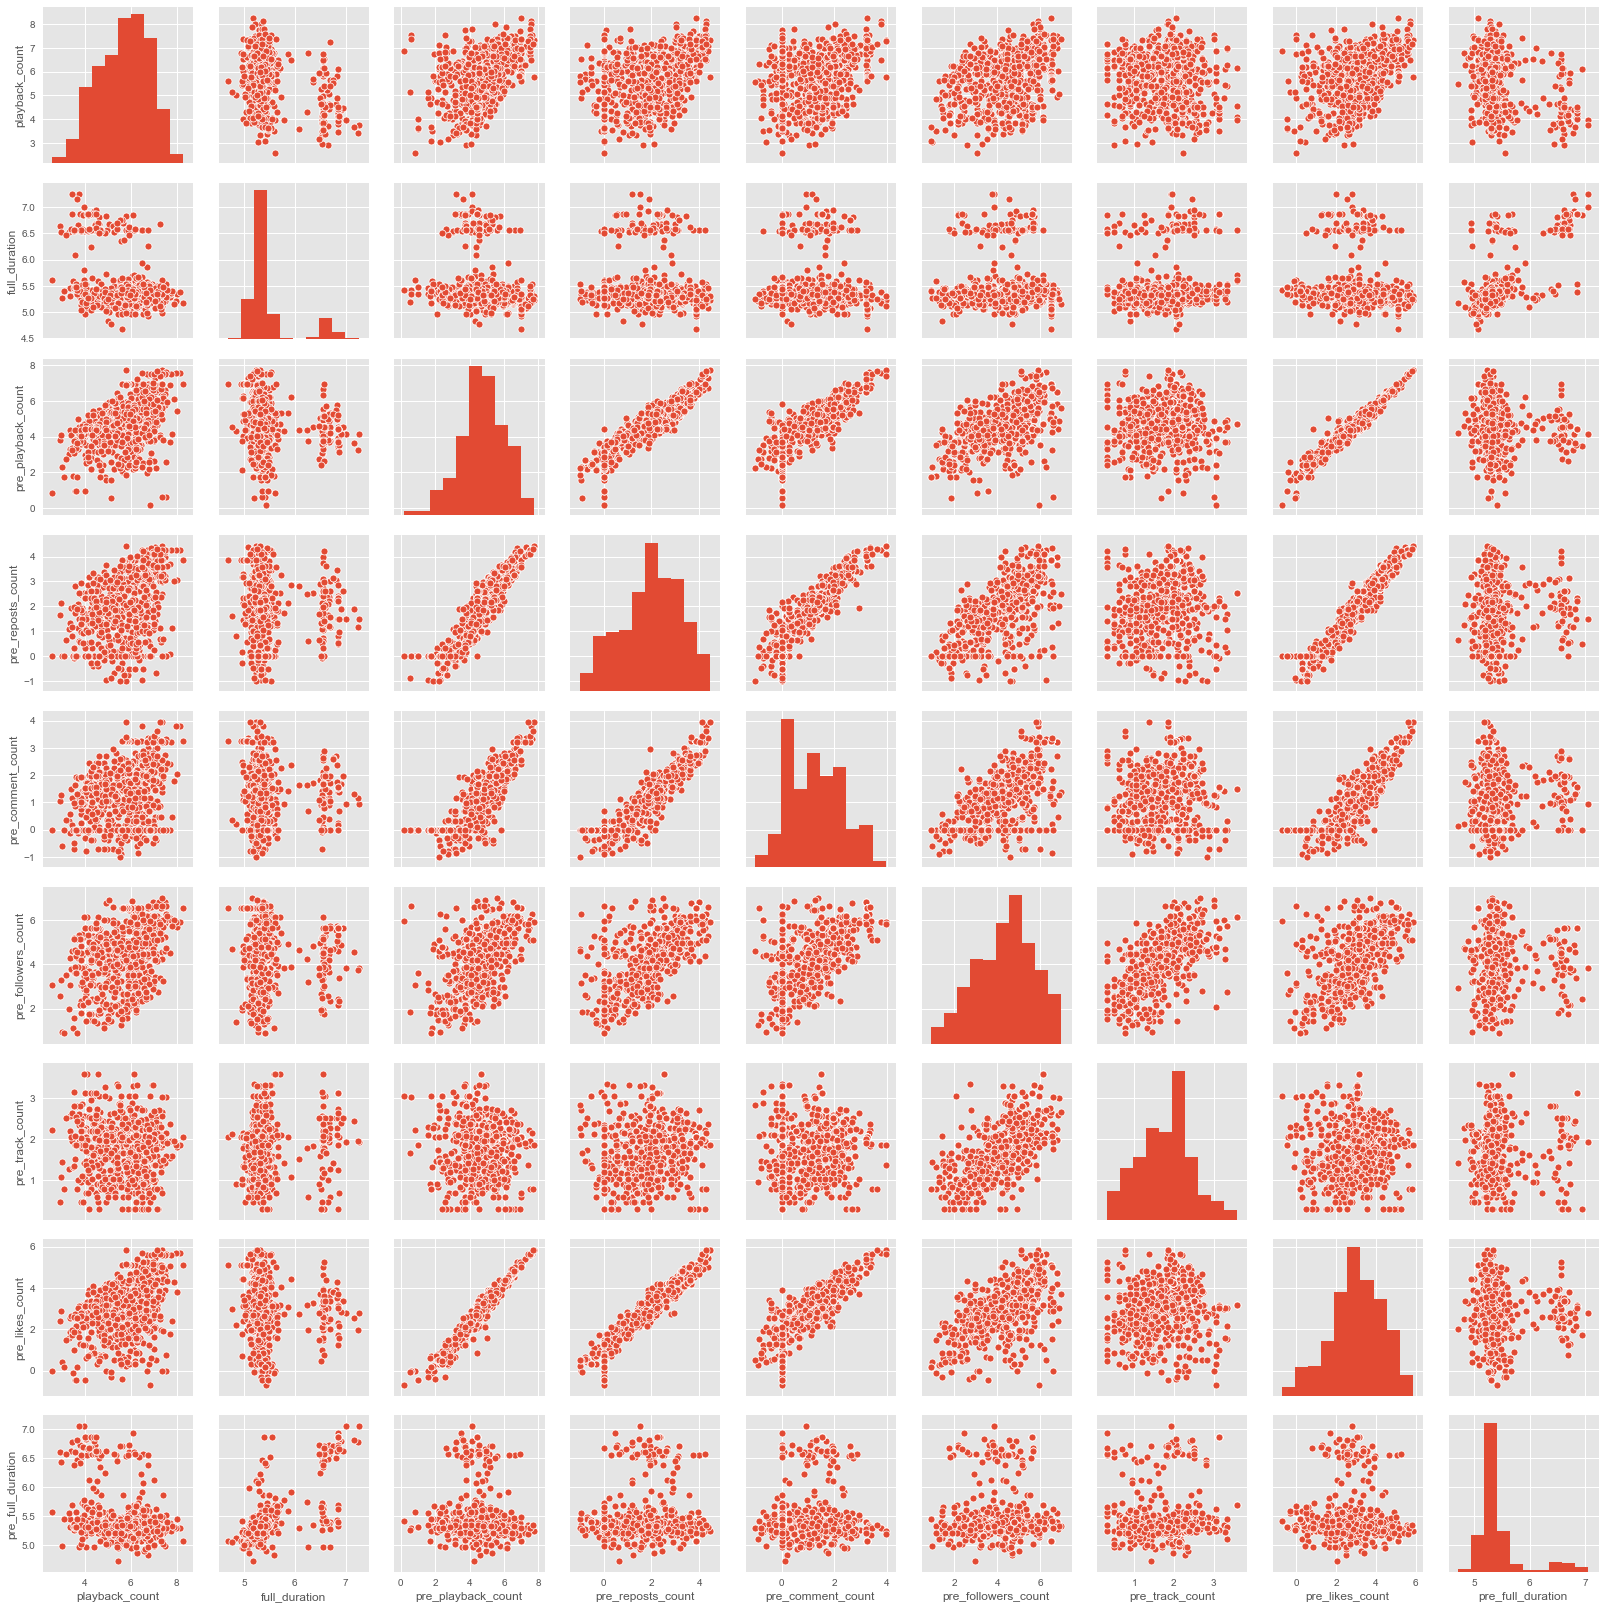

In [192]:
sns.pairplot(df_pair,palette='orange')

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import RidgeCV,LassoCV

# hold out 20% of the data for final testing
X, y = df_pair.drop(['playback_count'],axis=1), df_pair['playback_count']
X, X_holdout, y, y_holdout = train_test_split(X, y, test_size=.20, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.30)


In [195]:
#set up the 3 models we're choosing from:
lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
# X_test_scaled = scaler.transform(X_holdout.values)

lm_reg = RidgeCV()
lm_las = LassoCV()

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
# X_test_poly = poly.transform(X_holdout.values)

lm_poly = LassoCV()

In [ ]:
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
lm_las.fit(X_train_scaled, y_train)
print(f'Lasso Regression val R^2: {lm_las.score(X_val_scaled, y_val):.3f}')
lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

In [200]:
X_holdout_scaled = scaler.transform(X_holdout.values)

print(f'Linear Regression val R^2: {lm.score(X_holdout, y_holdout):.3f}')
print(f'Ridge Regression val R^2: {lm_las.score(X_holdout_scaled, y_holdout):.3f}')
print(f'Lasso Regression val R^2: {lm_reg.score(X_holdout_scaled, y_holdout):.3f}')

# lm_poly.fit(X_train_poly, y_train)
# print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_holdout, y_holdout):.3f}')

Linear Regression val R^2: 0.393
Ridge Regression val R^2: 0.392
Lasso Regression val R^2: 0.392


In [201]:
X_holdout_poly = poly.fit_transform(X_holdout.values)
# X_val_poly = poly.transform(X_val.values)

print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_holdout_poly, y_holdout):.3f}')

Degree 2 polynomial regression val R^2: 0.489


In [202]:
X_holdout_poly = poly.fit_transform(X_holdout.values)
# X_val_poly = poly.transform(X_val.values)

print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_holdout_poly, y_holdout):.3f}')

Degree 2 polynomial regression val R^2: 0.489


In [166]:
#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=3) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
# X_test_poly = poly.transform(X_holdout.values)

lm_poly = RidgeCV()
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 3 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
X_holdout_poly = poly.fit_transform(X_holdout.values)
# X_val_poly = poly.transform(X_val.values)

print(f'Degree 3 polynomial regression val R^2: {lm_poly.score(X_holdout_poly, y_holdout):.3f}')

Degree 3 polynomial regression val R^2: 0.482
Degree 3 polynomial regression val R^2: 0.461
